In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action='ignore',category=np.VisibleDeprecationWarning)

# Lecture 11 

In this lecture, we will:
1. Introduce python Lists
2. Show how to build tables from rows instead of columns
3. finish our discussion on grouping
4. Introduce pivots -- a special kind of grouping
5. Introduce joins

---

## Lists

Lists in python are like arrays but they can contain things of different types and you make them by using square brackets:

In [2]:
[1, 5, 'hello', 5.0]

[1, 5, 'hello', 5.0]

In [3]:
another_list = [1, 5, 'hello', 5.0, make_array(1,2,3)]
another_list

[1, 5, 'hello', 5.0, array([1, 2, 3])]

You have to use square brakets when accessing elements from a list (you can't use item).

In [4]:
another_list[2]

'hello'

Recall that for arrays you could do either. (In the real world, most people would probably use square brackets).

In [5]:
my_array = make_array("Apple", "Banana", "Corn")
my_array[1]

'Banana'

Same thing as:

In [6]:
my_array.item(1)

'Banana'

<br><br><br><br>

### Rows from lists

We need lists to be able to add a row to our table.  Why?


Here we make a table with a column (we have been doing this all semester).

In [7]:
Table().with_columns('Numbers', [1, 2, 3])

Numbers
1
2
3


<br><br><br>
Here we make an empty table with just column labels. (This is new!)

In [8]:
drinks = Table(['Drink', 'Cafe', 'Price'])
drinks

Drink,Cafe,Price


<br><br><br>
Here we add rows to our table.  Each row is a `List` of elements -- one for each column.

In [9]:
drinks = drinks.with_rows([
    ['Milk Tea', 'Asha', 5.5],
    ['Espresso', 'Strada',  1.75],
    ['Latte',    'Strada',  3.25],
    ['Espresso', "FSM",   2]
])
drinks

Drink,Cafe,Price
Milk Tea,Asha,5.5
Espresso,Strada,1.75
Latte,Strada,3.25
Espresso,FSM,2


<br><br><br><br><br>

---

<center> Return to Slides </center>

---

<br><br><br><br><br>

## Review Grouping Using the Welcome Survey

Now let's use the group function to study you:

In [10]:
survey = Table.read_table('welcome_survey_sp23.csv')
survey.show(3)

Year,Extraversion,Number of textees,Hours of sleep,Handedness,Pant leg,Sleep position,Pets,Piercings
Second Year,2,5,9,Right-handed,Right leg in first,On your right side,"Cat, Dog, Fish, Snake, Lizard",-3
First Year,2,3,8,Right-handed,I don't know,On your back,None,-1
First Year,5,5,8,Right-handed,Right leg in first,On your left side,Bearded dragon,0


<br><br><br><br>
**Exercise:** What happens if we group by `"Year"` with no additional arguments?

In [11]:
survey.group("Year")

Year,count
Fifth Year or above,9
First Year,606
Fourth Year,109
Graduate Student,7
Second Year,468
Third Year,302


<br><br><br><br><br>

What is the relationship between year and the average amount of sleep?

**Exercise:** Computer the average `"Hours of sleep"` for each `"Year"` and display the result as bar chart with the bars in a meaningful order.


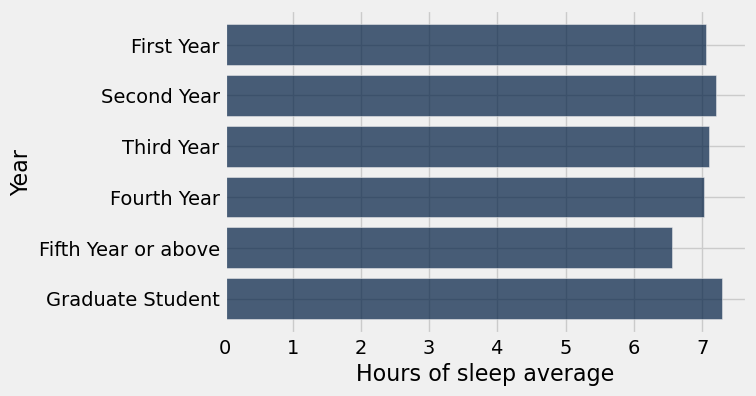

In [12]:
(
    survey
    .select("Year", "Hours of sleep")
    .group("Year", np.average)
    .take(1,4,5,2,0,3)
    .barh("Year")
)
# plots.xlim([6,7.5])

<br><details><summary>Click for Solution</summary> <br>
    
```python
(
    survey
    .select("Year", "Hours of sleep")
    .group("Year", np.average)
    .take(1,4,5,2,0,3)
    .barh("Year")
)
plots.xlim([6,7.5])
```
    
<br></details><br>

<br><br><br><br><br><br>

### Understanding Extraversion

How extraverted is the class?


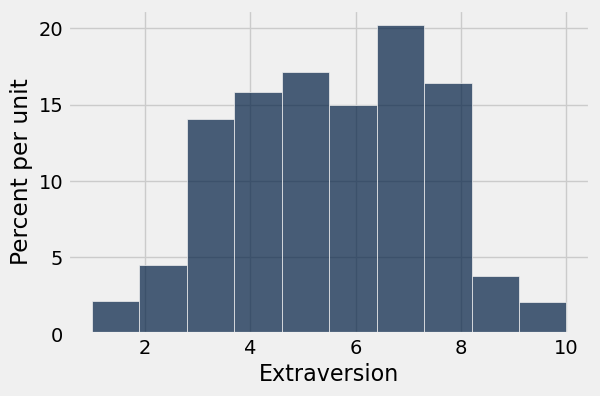

In [13]:
survey.hist('Extraversion')

<br><br><br><br><br><br>

**Exercise:** Compute the *average* `"Number of textees"`, `"Hours of sleep"`, `"Piercings"` for each value of `"Extraversion"`.  Save the resulting table as `by_extra`.

In [14]:
by_extra = (
    survey
    .select("Extraversion", "Number of textees", "Hours of sleep", "Piercings")
    .group('Extraversion', np.mean)
)
by_extra

Extraversion,Number of textees mean,Hours of sleep mean,Piercings mean
1,3.44828,6.60345,1.72414
2,4.08197,6.98361,1.13115
3,4.75263,7.23158,1.41053
4,5.14953,7.11449,1.49533
5,6.14286,7.07576,1.64502
6,6.74257,6.98267,1.87129
7,10.989,7.09158,3.66301e+06
8,9.7027,7.22297,2.14414
9,11.9608,7.29412,2.41176
10,9.25,6.78571,1.89286


<br><details><summary>Click for Solution</summary> <br>
    
```python
by_extra = (
    survey
    .select("Extraversion", "Number of textees", "Hours of sleep", "Piercings")
    .group('Extraversion', np.mean)
)
by_extra
```
    
<br></details><br>

Do you see any trends?  Let's plot the data to make it clearer.

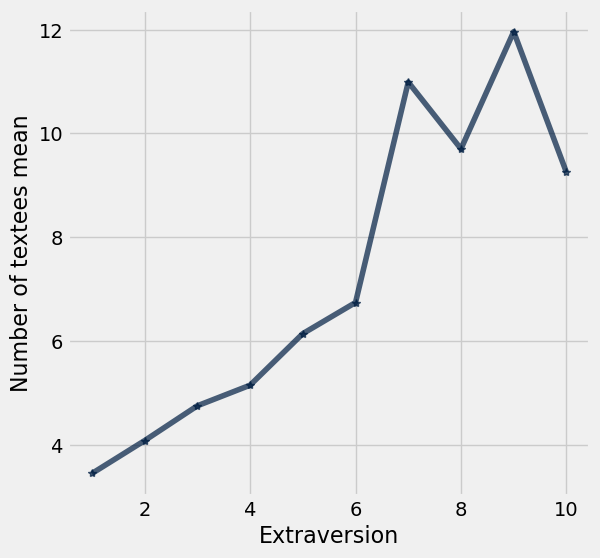

In [15]:
by_extra.plot('Extraversion', 'Number of textees mean', marker="*")

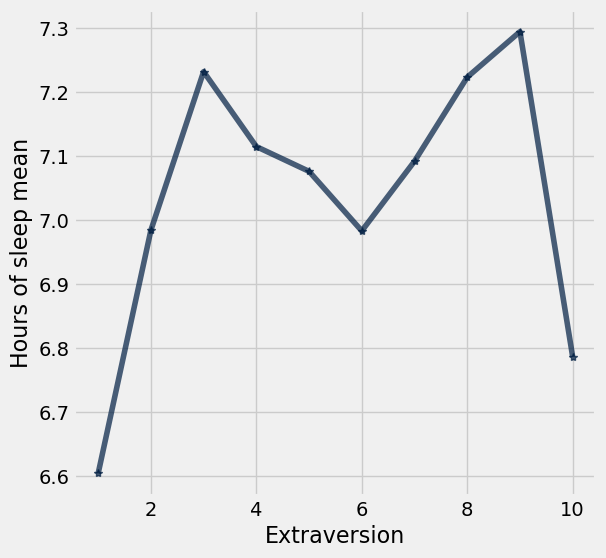

In [16]:
by_extra.plot('Extraversion', 'Hours of sleep mean', marker="*")

<br><br><br><br><br>

---

<center> Return to Slides </center>

---

<br><br><br><br><br>

<br><br><br><br><br><br>

---

## Grouping by Two Columns 

Do right-handed people tend to sleep on their left side and left-handed people sleep on their right side? 

<br><br>

**Exercise:** Use the group function to count how many people are in each combination of `"Handedness"` and `"Sleep position"`.

In [17]:
(
    survey
    .group(["Handedness", "Sleep position"])
    .show()
)

Handedness,Sleep position,count
Ambidextrous,On your back,2
Ambidextrous,On your left side,4
Ambidextrous,On your right side,3
Ambidextrous,On your stomach,3
Left-handed,On your back,27
Left-handed,On your left side,40
Left-handed,On your right side,46
Left-handed,On your stomach,9
Right-handed,On your back,334
Right-handed,On your left side,395


<br><details><summary>Click for Solution</summary> <br>
    
```python
(
    survey
    .group(["Handedness", "Sleep position"])
    .show()
)
```
    
<br></details><br>

<br><br><br><br>

What combination of `"Handedness"` and `"Sleep position"` results in the most sleep on average?

**Exercise:** Use group to answer the above question.

In [18]:
(
    survey
    .select("Handedness", "Sleep position", "Hours of sleep")
    .group(['Handedness', 'Sleep position'], np.average)
    .show()
)

Handedness,Sleep position,Hours of sleep average
Ambidextrous,On your back,7
Ambidextrous,On your left side,7.375
Ambidextrous,On your right side,7.33333
Ambidextrous,On your stomach,9
Left-handed,On your back,7
Left-handed,On your left side,7.2125
Left-handed,On your right side,7.30435
Left-handed,On your stomach,6.72222
Right-handed,On your back,7.13323
Right-handed,On your left side,7.05823


<br><details><summary>Click for Solution</summary> <br>
    
```python
(
    survey
    .select("Handedness", "Sleep position", "Hours of sleep")
    .group(['Handedness', 'Sleep position'], np.average)
    .show()
)
```
    
<br></details><br>

## Pivot Tables

When grouping by two columns it will sometimes be easier to re-arrange the table so the columns correspond to the *values* of one of the original grouped columns. 

Here is an example:


In [19]:
(
    survey
    .pivot("Handedness", "Sleep position", "Hours of sleep", np.mean)
)

Sleep position,Ambidextrous,Left-handed,Right-handed
On your back,7,7,7.13323
On your left side,7.375,7.2125,7.05823
On your right side,7.33333,7.30435,7.03579
On your stomach,9,6.72222,7.24847


Here I am rewriting the example by explicity naming the function arguments.  You wouldn't do this in practice but it helps to highlight the meaning of the four things we passed to the function above.

In [20]:
(
    survey
    .pivot(
        columns = "Handedness", # The column whose unique values become columns
        rows    = "Sleep position", # The column whose unique values become rows
        values  = "Hours of sleep", # The column that will be used to compute the cells
        collect = np.mean # How to aggregate the values 
    )
)

Sleep position,Ambidextrous,Left-handed,Right-handed
On your back,7,7,7.13323
On your left side,7.375,7.2125,7.05823
On your right side,7.33333,7.30435,7.03579
On your stomach,9,6.72222,7.24847


Just as with the regular `group` function you will often want counts of combinations. In this case, you only need to specify the column to turn into columns and the column to turn into rows.

In [21]:
survey.pivot("Sleep position", "Handedness")

Handedness,On your back,On your left side,On your right side,On your stomach
Ambidextrous,2,4,3,3
Left-handed,27,40,46,9
Right-handed,334,395,475,163


Pivots can be useful for visualizations:

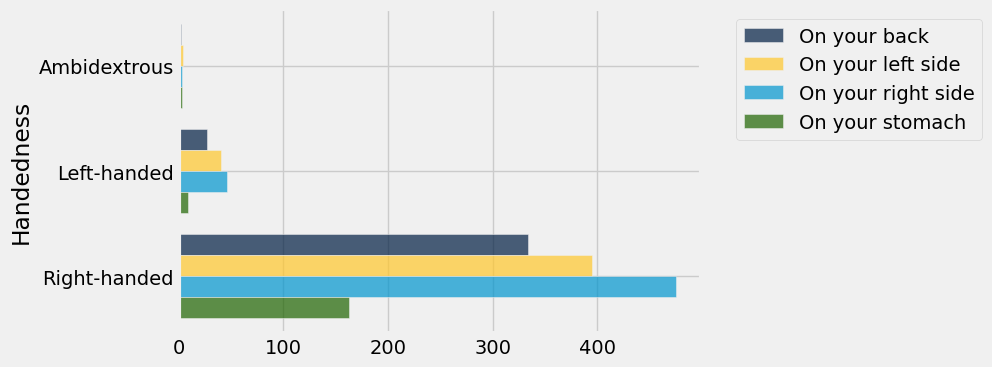

In [22]:
survey.pivot("Sleep position", "Handedness").barh("Handedness")

<br><br><br><br><br>

---

<center> Return to Slides </center>

---

<br><br><br><br><br>

## Joins

We use join to **join** two tables on a column.

In [23]:
drinks

Drink,Cafe,Price
Milk Tea,Asha,5.5
Espresso,Strada,1.75
Latte,Strada,3.25
Espresso,FSM,2


In [24]:
discounts = Table().with_columns(
    'Coupon % off', make_array(10, 25, 5),
    'Location', make_array('Asha', 'Strada', 'Asha')
)
discounts

Coupon % off,Location
10,Asha
25,Strada
5,Asha


**Exercise:** Combine the `drinks` and `discounts` table into a new table which has all possible discounts for each drink.

In [25]:
combined = drinks.join('Cafe', discounts, 'Location')
combined

Cafe,Drink,Price,Coupon % off
Asha,Milk Tea,5.5,10
Asha,Milk Tea,5.5,5
Strada,Espresso,1.75,25
Strada,Latte,3.25,25


<br><br><br>

**Exercise:** Calculate the lowest rate you can get for each drink using the available coupons.

In [26]:
discount_frac = 1-combined.column("Coupon % off")/100.0

(
    combined
    .with_column("Discounted Price", combined.column("Price") * discount_frac)
    .select("Drink", "Discounted Price")
    .group("Drink", min)
)
                 


Drink,Discounted Price min
Espresso,1.3125
Latte,2.4375
Milk Tea,4.95


**Exercise:** What happens if I run the following? How many rows will it produce.


In [27]:
drinks.join('Cafe', drinks, 'Cafe')

Cafe,Drink,Price,Drink_2,Price_2
Asha,Milk Tea,5.5,Milk Tea,5.5
FSM,Espresso,2,Espresso,2
Strada,Espresso,1.75,Espresso,1.75
Strada,Espresso,1.75,Latte,3.25
Strada,Latte,3.25,Espresso,1.75
Strada,Latte,3.25,Latte,3.25


<br><br><br><br><br>

---

<center> Return to Slides </center>

---

<br><br><br><br><br>

## Discussion Questions ##

In [28]:
# From the CORGIS Dataset Project
# By Austin Cory Bart acbart@vt.edu
# Version 2.0.0, created 3/22/2016
# https://corgis-edu.github.io/corgis/csv/skyscrapers/

sky = Table.read_table('skyscrapers.csv')
sky = (sky.with_column('age', 2022 - sky.column('completed'))
          .drop('completed'))
sky.show(3)

name,material,city,height,age
One World Trade Center,mixed/composite,New York City,541.3,8
Willis Tower,steel,Chicago,442.14,48
432 Park Avenue,concrete,New York City,425.5,7


In [29]:
# 1. For each city, what’s the tallest building for each material?










In [30]:
# 2. For each city, what’s the height difference between the tallest 
#    steel building and the tallest concrete building?












Don't read ahead until you try the challenge questions yourself first!

In [31]:
sky.select('material', 'city', 'height').group(['city', 'material'], collect=max)

city,material,height max
Atlanta,concrete,264.25
Atlanta,mixed/composite,311.8
Atlanta,steel,169.47
Austin,concrete,208.15
Austin,steel,93.6
Baltimore,concrete,161.24
Baltimore,steel,155.15
Boston,concrete,121.92
Boston,mixed/composite,139
Boston,steel,240.79


In [32]:
sky_p = sky.pivot('material', 'city', values='height', collect=max)
sky_p.show()

city,concrete,mixed/composite,steel
Atlanta,264.25,311.8,169.47
Austin,208.15,0,93.6
Baltimore,161.24,0,155.15
Boston,121.92,139,240.79
Charlotte,265.48,239.7,179.23
Chicago,423.22,306.94,442.14
Cincinnati,125,202.69,175
Cleveland,125,288.65,215.8
Columbus,79.25,0,169.3
Dallas,176.48,280.72,270.06


In [33]:
sky_p = sky_p.with_column(
    'difference', 
    abs(sky_p.column('steel') - sky_p.column('concrete'))
)
sky_p

city,concrete,mixed/composite,steel,difference
Atlanta,264.25,311.8,169.47,94.78
Austin,208.15,0,93.6,114.55
Baltimore,161.24,0,155.15,6.09001
Boston,121.92,139,240.79,118.87
Charlotte,265.48,239.7,179.23,86.25
Chicago,423.22,306.94,442.14,18.92
Cincinnati,125,202.69,175,50
Cleveland,125,288.65,215.8,90.8
Columbus,79.25,0,169.3,90.05
Dallas,176.48,280.72,270.06,93.58


In [34]:
sky_p.sort('difference', True)

city,concrete,mixed/composite,steel,difference
Sunny Isles Beach,196,0,0,196
Las Vegas,350.22,195.68,164.6,185.62
Miami Beach,170.39,0,0,170.39
Pittsburgh,89.3,172,256.34,167.04
Los Angeles,145.7,118.26,310.29,164.59
Philadelphia,157.89,296.73,288.04,130.15
Boston,121.92,139,240.79,118.87
Austin,208.15,0,93.6,114.55
Seattle,138.69,284.38,235.31,96.62
Atlanta,264.25,311.8,169.47,94.78


In [35]:
# 3. Generate a table of the names of the oldest buildings for each 
#    material for each city:

# Hint: You can use sort to find the name of the oldest building in the dataset
sky.sort('age', descending=True).column('name').item(0)











'Statue of Liberty'

(No peeking! A solution appears below.)

In [36]:
def first(s):
    "Return the first element in an array."
    return s.item(0)

(sky
 .sort('age', descending=True)
 .pivot('material', 'city', 'name', first)
)#.where('city', 'San Francisco')

city,concrete,mixed/composite,steel
Atlanta,Westin Peachtree Plaza,One Atlantic Center,FlatironCity
Austin,One American Center,,University of Texas Tower
Baltimore,Charles Towers North Apartments,,Emerson Tower
Boston,Harbor Towers I,Ellison Building,Marriott's Custom House
Charlotte,Bank of America Corporate Center,Hearst Tower,Midtown Plaza
Chicago,The Powhatan,American Furniture Mart,The Rookery
Cincinnati,Kroger Building,Great American Tower at Queen City Square,PNC Tower
Cleveland,National City Center,55 Public Square,Huntington Bank Building
Columbus,Key Bank Building,,Leveque Tower
Dallas,Reunion Tower,Bank of America Plaza,Three AT&T Plaza
